# Open loop process simulation

## Imports

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from math import e

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

## Global simulation parameters

In [59]:
Ts = 1

## Import values from experiment
### MV

In [60]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_MV_2025-03-11-09h36.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)    

MV


## Graphical values for MV

In [62]:
t1 = 93.3333
t2 = 130
Tu = 24.5
Tg = 217
a = 0.1056
Kp = 0.3432

## Values obtained through optimal identification

In [63]:
#SOPDT
# Final SSE Objective: 0.06298831954084146
K_SOPDT_OPT = 0.3562231735602847
T1_SOPDT_OPT = 164.90136281744202
T2_SOPDT_OPT = 41.937854162157095
theta_SOPDT_OPT = 1.058634883965729

# FOPDT
# Final SSE Objective: 0.07168520488658303
K_FOPDT_OPT = 0.36494176878746953
T_FOPDT_OPT = 195.32917074463708
theta_FOPDT_OPT = 27.848711216640375

## Calculation of parameters from graphical values

In [ ]:
#Broida 1
theta_FOPT1_GRAPH = Tu
T_FOPT1_GRAPH = Tg
K_FOPT1_GRAPH = Kp

#Broida 2
theta_FOPT2_GRAPH = (2.8*t1)-(1.8*t2)
T_FOPT2_GRAPH = 5.5*(t2-t1)
K_FOPT2_GRAPH = Kp

#van der Grinten
T1_SOPT1_GRAPH = Tg*((3*a*e-1)/(1+a*e))
T2_SOPT1_GRAPH = Tg*((1-a*e)/(1+a*e))
theta_SOPT1_GRAPH = Tu-((T1_SOPT1_GRAPH*T2_SOPT1_GRAPH)/(T1_SOPT1_GRAPH+3*T2_SOPT1_GRAPH))
K_SOPT1_GRAPH = Kp

#Strejc
print(Tu/Tg)
n_SOPT2_GRAPH = 2 #Obtained from tables
a_SOPT2_GRAPH = 0.1
b_SOPT2_GRAPH = 2.72
theta_SOPT2_GRAPH = Tu-a_SOPT2_GRAPH*Tg
Tuth_SOPT2_GRAPH = a_SOPT2_GRAPH*Tg
T_SOPT2_GRAPH = Tg/b_SOPT2_GRAPH

0.11290322580645161


## Calculate step responses

In [65]:
PV_SOPDT_OPT = SOPDT(MVm,K_SOPDT_OPT,T1_SOPDT_OPT,T2_SOPDT_OPT,theta_SOPDT_OPT,Ts)
PV_FOPDT_OPT = FOPDT(MVm,K_FOPDT_OPT,T_FOPDT_OPT,theta_FOPDT_OPT,Ts)

PV_FOPT1_GRAPH = FOPDT(MVm,K_FOPT1_GRAPH,T_FOPT1_GRAPH,theta_FOPT1_GRAPH,Ts)
PV_FOPT2_GRAPH = FOPDT(MVm,K_FOPT2_GRAPH,T_FOPT2_GRAPH,theta_FOPT2_GRAPH,Ts)
PV_SOPT1_GRAPH = SOPDT(MVm,K_SOPT1_GRAPH,T1_SOPT1_GRAPH,T2_SOPT1_GRAPH,theta_SOPT1_GRAPH,Ts)
PV_SOPT2_GRAPH = SOPDT(MVm,K_SOPDT_OPT,Tuth_SOPT2_GRAPH,T_SOPT2_GRAPH,theta_SOPDT_OPT,Ts)

## Plot responses

(0.0, 693.0)

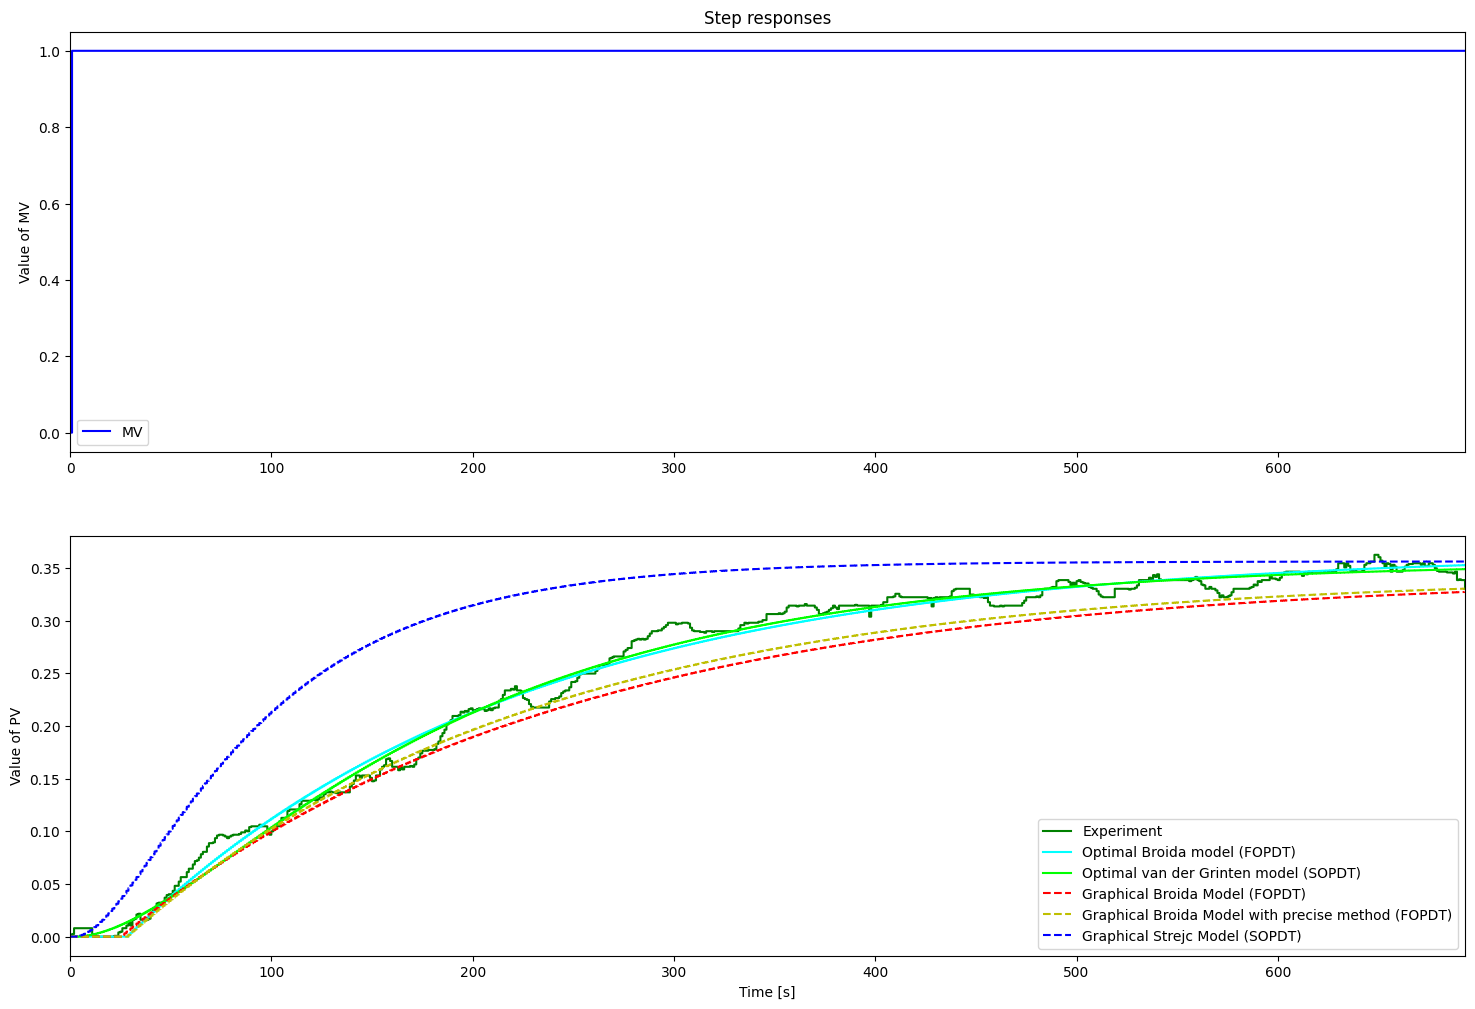

In [ ]:
plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
plt.step(tm,MVm,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Step responses')
plt.legend(loc='best')
plt.xlim([0, np.max(tm)])   

plt.subplot(2,1,2)
plt.step(tm,PVm,'g',label='Experiment',where='post')
plt.step(tm,PV_FOPDT_OPT,'cyan',label='Optimal Broida model (FOPDT)',where='post')
plt.step(tm,PV_SOPDT_OPT,'lime',label='Optimal van der Grinten model (SOPDT)',where='post')
plt.step(tm,PV_FOPT1_GRAPH,'r--',label='Graphical Broida Model (FOPDT)',where='post')
plt.step(tm,PV_FOPT2_GRAPH,'y--',label='Graphical Broida Model with precise method (FOPDT)',where='post')
#plt.step(tm,PV_SOPT1_GRAPH,'c--',label='Graphical van der Grinten Model (SOPDT)',where='post'), not plotting as it is unstable
plt.step(tm,PV_SOPT2_GRAPH,'b--',label='Graphical Strejc Model (SOPDT)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')  
plt.xlim([0, np.max(tm)])
plt.savefig('Plots\SimOLP_STEP_PV.png',transparent=True)
plt.savefig('Plots\SimOLP_STEP_PV.pdf',transparent=True)


## Bode diagrams

Text(0, 0.5, 'Phase [°]')

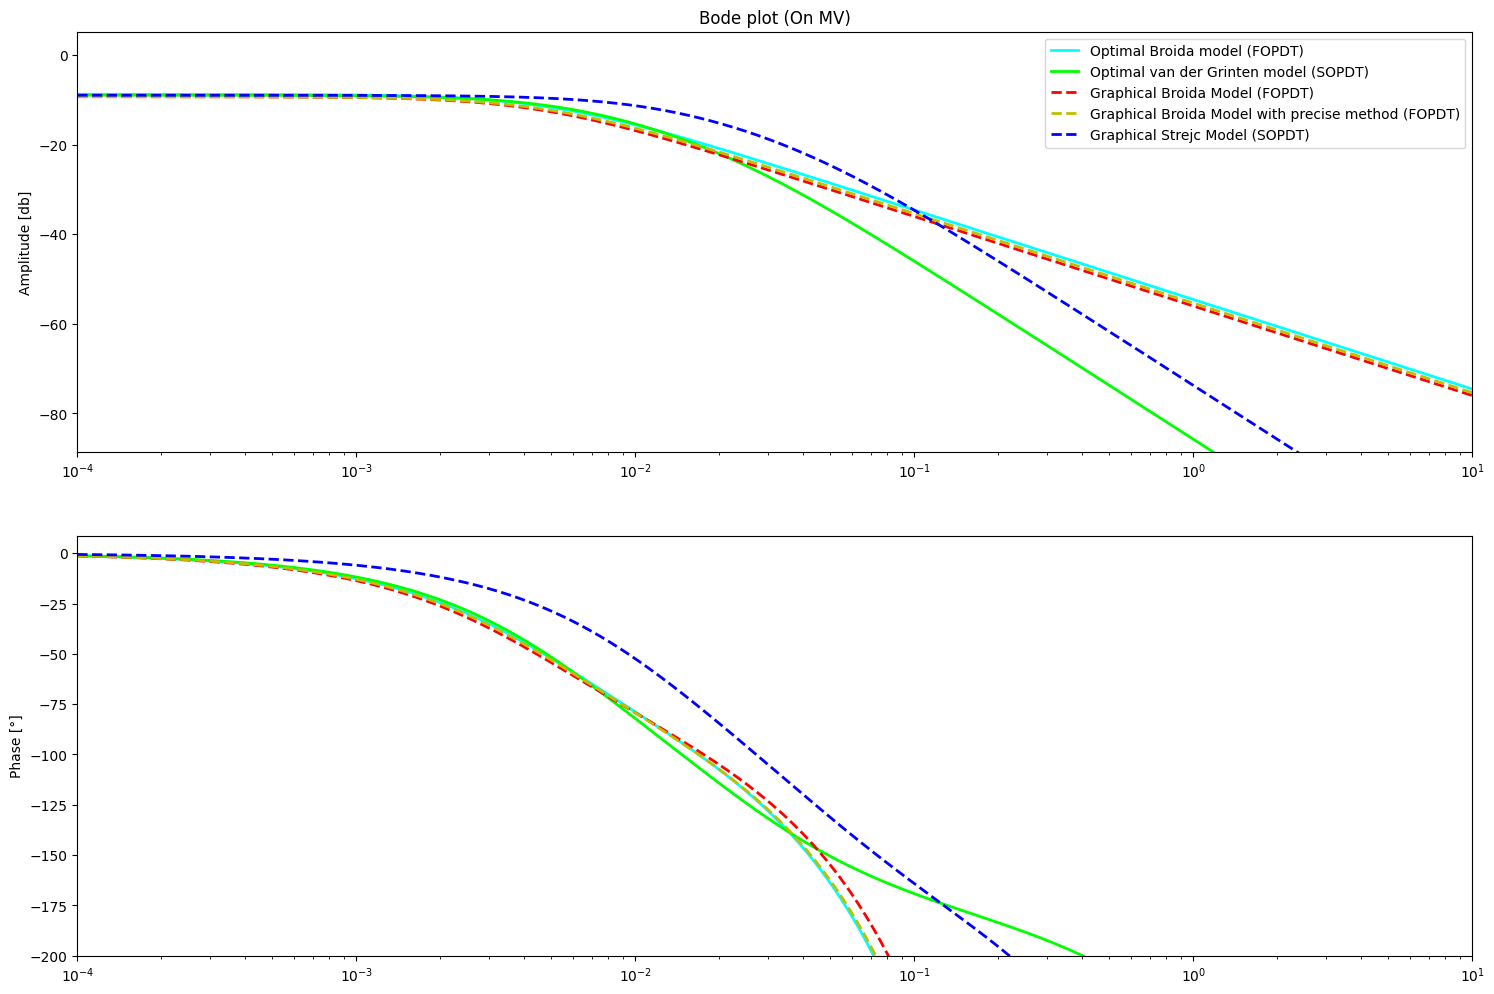

In [ ]:
# Frequency response
P_FOPDTOPT = Process({})
P_FOPDTOPT.parameters['Kp'] = K_FOPDT_OPT
P_FOPDTOPT.parameters['Tlag1'] = T_FOPDT_OPT
P_FOPDTOPT.parameters['theta'] = theta_FOPDT_OPT

# Frequency response
P_SOPDTOPT = Process({})
P_SOPDTOPT.parameters['Kp'] = K_SOPDT_OPT
P_SOPDTOPT.parameters['Tlag1'] = T1_SOPDT_OPT
P_SOPDTOPT.parameters['Tlag2'] = T2_SOPDT_OPT
P_SOPDTOPT.parameters['theta'] = theta_SOPDT_OPT

P_FOPDT1_GRAPH = Process({})
P_FOPDT1_GRAPH.parameters['Kp'] = K_FOPT1_GRAPH
P_FOPDT1_GRAPH.parameters['Tlag1'] = T_FOPT1_GRAPH
P_FOPDT1_GRAPH.parameters['theta'] = theta_FOPT1_GRAPH

P_FOPDT2_GRAPH = Process({})
P_FOPDT2_GRAPH.parameters['Kp'] = K_FOPT2_GRAPH
P_FOPDT2_GRAPH.parameters['Tlag1'] = T_FOPT2_GRAPH
P_FOPDT2_GRAPH.parameters['theta'] = theta_FOPT2_GRAPH

P_SOPT1_GRAPH = Process({})
P_SOPT1_GRAPH.parameters['Kp'] = K_SOPT1_GRAPH
P_SOPT1_GRAPH.parameters['Tlag1'] = T1_SOPT1_GRAPH
P_SOPT1_GRAPH.parameters['Tlag2'] = T2_SOPT1_GRAPH
P_SOPT1_GRAPH.parameters['theta'] = theta_SOPT1_GRAPH

P_SOPT2_GRAPH = Process({})
P_SOPT2_GRAPH.parameters['Kp'] = K_SOPDT_OPT
P_SOPT2_GRAPH.parameters['Tlag1'] = Tuth_SOPT2_GRAPH
P_SOPT2_GRAPH.parameters['Tlag2'] = T_SOPT2_GRAPH
P_SOPT2_GRAPH.parameters['theta'] = theta_SOPT2_GRAPH



omega = np.logspace(-4, 1, 10000)
Ps_FOPDTOPT = Bode(P_FOPDTOPT,omega,False) # Optimal Broida
Ps_SOPDTOPT = Bode(P_SOPDTOPT,omega,False) # Optimal van der Grinten
Ps_FOPDT1_GRAPH = Bode(P_FOPDT1_GRAPH,omega,False) # Graphical Broida
Ps_FOPDT2_GRAPH = Bode(P_FOPDT2_GRAPH,omega,False) # Graphical Broida with precise method
Ps_SOPT1_GRAPH = Bode(P_SOPT1_GRAPH,omega,False) # Graphical van der Grinten
Ps_SOPT2_GRAPH = Bode(P_SOPT2_GRAPH,omega,False) # Graphical Strejc

plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
gain_min = np.min(20*np.log10(np.abs(Ps_FOPDTOPT)/5))
gain_max = np.max(20*np.log10(np.abs(Ps_FOPDTOPT)*5))
plt.semilogx(omega,20*np.log10(np.abs(Ps_FOPDTOPT)),'cyan',linewidth=2,label='Optimal Broida model (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_SOPDTOPT)),'lime',linewidth=2,label='Optimal van der Grinten model (SOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_FOPDT1_GRAPH)),'r--',linewidth=2,label='Graphical Broida Model (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_FOPDT2_GRAPH)),'y--',linewidth=2,label='Graphical Broida Model with precise method (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_SOPT2_GRAPH)),'b--',linewidth=2,label='Graphical Strejc Model (SOPDT)')
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude [db]')
plt.title('Bode plot (On MV)')
plt.legend(loc='best')

plt.subplot(2,1,2)
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) + 10
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT)),'cyan',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_SOPDTOPT)),'lime',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_FOPDT1_GRAPH)),'r--',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_FOPDT2_GRAPH)),'y--',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_SOPT2_GRAPH)),'b--',linewidth=2)
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([np.max([ph_min, -200]), ph_max])
plt.ylabel('Phase [°]')
plt.savefig('Plots\SimOLP_BODE_PV.png',transparent=True)
plt.savefig('Plots\SimOLP_BODE_PV.pdf',transparent=True)

## DV

In [87]:
## DV
nameFile = 'Cleaned_data_Open_loop_experiment_on_DV_2025-03-11-14h31.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)
print(len(tm))
print(len(PVm))
print(len(DVm))    

DV
716
716
716


## Values obtained through optimization

In [84]:
#SOPDT
K_SOPDT_OPT_DV = 0.3470577806298568
T1_SOPDT_OPT_DV = 160.56027097048144
T2_SOPDT_OPT_DV = 35.99302014643125
theta_SOPDT_OPT_DV = 9.177287203018302

# FOPDT
K_FOPDT_OPT_DV = 0.35071465123519246
T_FOPDT_OPT_DV = 176.01877339652688
theta_FOPDT_OPT_DV = 37.000069515053895

## Calculate step responses

In [88]:
DV_SOPDT_OPT = SOPDT(DVm,K_SOPDT_OPT,T1_SOPDT_OPT,T2_SOPDT_OPT,theta_SOPDT_OPT,Ts)
DV_FOPDT_OPT= FOPDT(DVm,K_FOPDT_OPT,T_FOPDT_OPT,theta_FOPDT_OPT,Ts)

## Plot step responses

(0.0, 715.0)

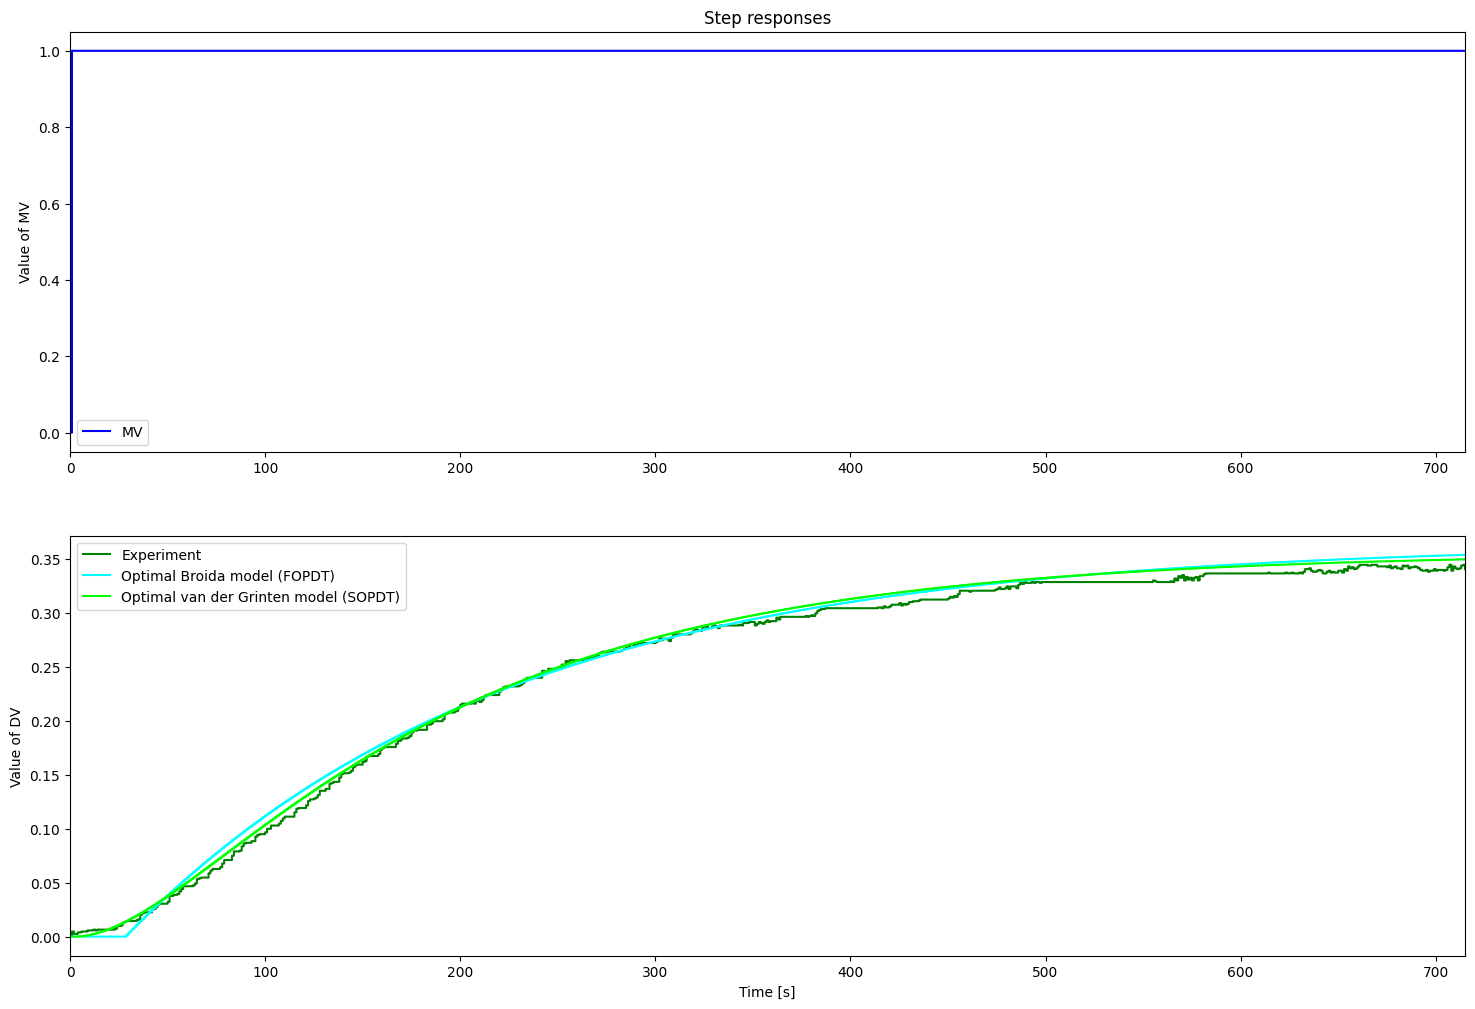

In [ ]:
plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
plt.step(tm,DVm,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Step responses')
plt.legend(loc='best')
plt.xlim([0, np.max(tm)])   

plt.subplot(2,1,2)
plt.step(tm,PVm,'g',label='Experiment',where='post')
plt.step(tm,DV_FOPDT_OPT,'cyan',label='Optimal Broida model (FOPDT)',where='post')
plt.step(tm,DV_SOPDT_OPT,'lime',label='Optimal van der Grinten model (SOPDT)',where='post')
plt.ylabel('Value of DV')
plt.xlabel('Time [s]')
plt.legend(loc='best')  
plt.xlim([0, np.max(tm)])
plt.savefig('Plots\SimOLP_STEP_DV.png',transparent=True)
plt.savefig('Plots\SimOLP_STEP_DV.pdf',transparent=True)

## Bode diagram

Text(0, 0.5, 'Phase [°]')

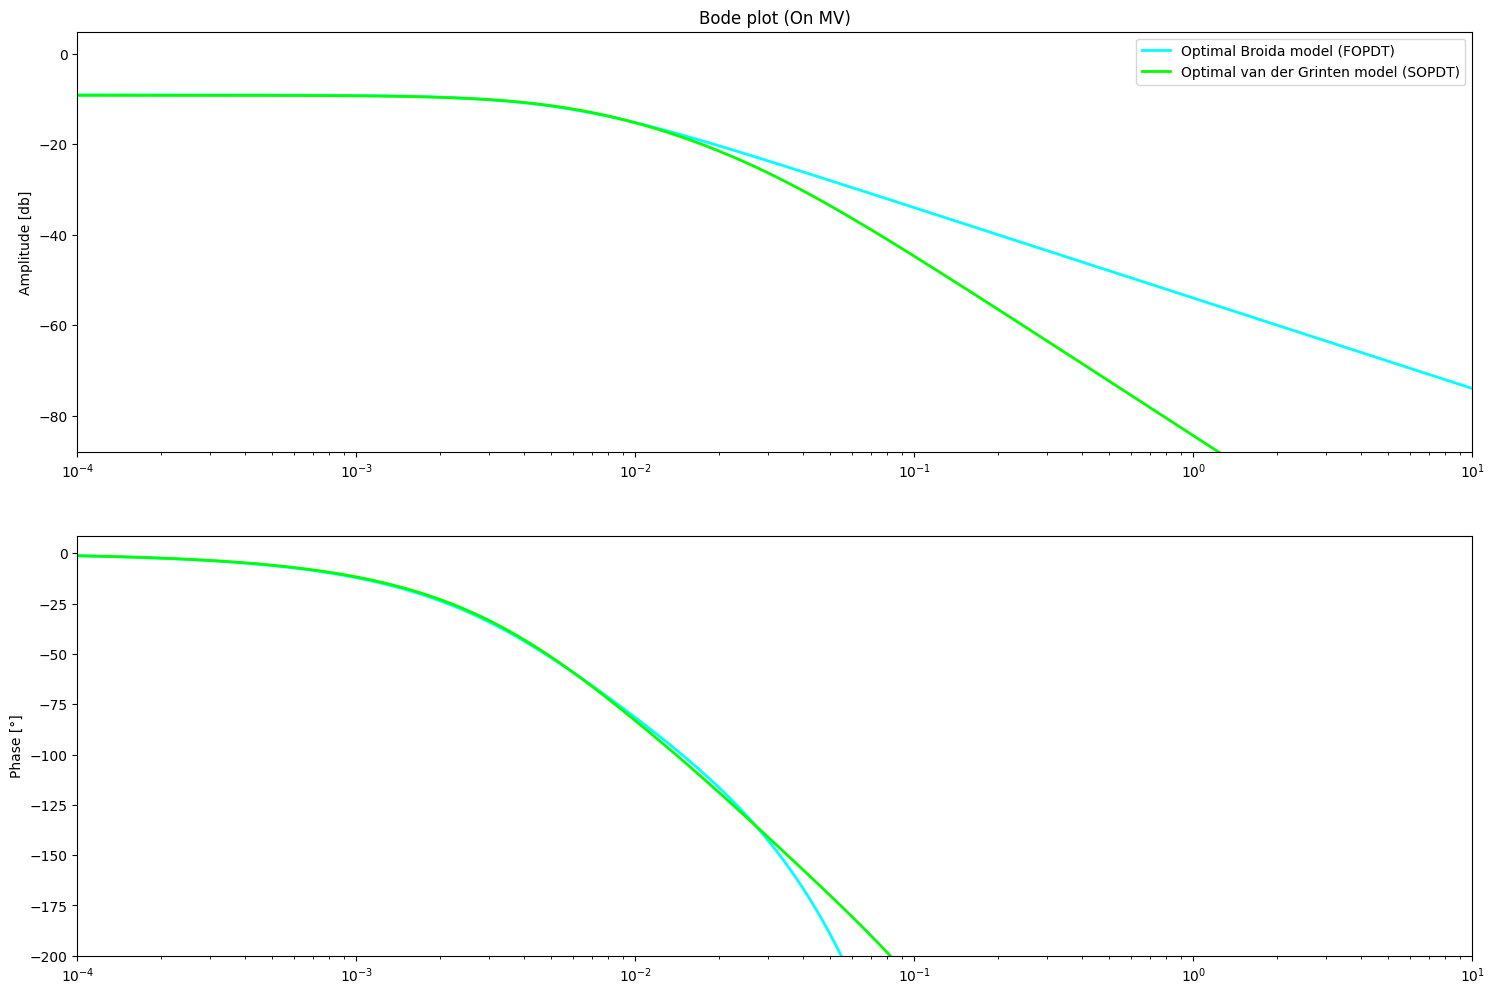

In [ ]:
# Frequency response
P_FOPDTOPT = Process({})
P_FOPDTOPT.parameters['Kp'] = K_FOPDT_OPT_DV
P_FOPDTOPT.parameters['Tlag1'] = T_FOPDT_OPT_DV
P_FOPDTOPT.parameters['theta'] = theta_FOPDT_OPT_DV

# Frequency response
P_SOPDTOPT = Process({})
P_SOPDTOPT.parameters['Kp'] = K_SOPDT_OPT_DV
P_SOPDTOPT.parameters['Tlag1'] = T1_SOPDT_OPT_DV
P_SOPDTOPT.parameters['Tlag2'] = T2_SOPDT_OPT_DV
P_SOPDTOPT.parameters['theta'] = theta_SOPDT_OPT_DV


omega = np.logspace(-4, 1, 10000)
Ps_FOPDTOPT = Bode(P_FOPDTOPT,omega,False) # Optimal Broida
Ps_SOPDTOPT = Bode(P_SOPDTOPT,omega,False) # Optimal van der Grinten

plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
gain_min = np.min(20*np.log10(np.abs(Ps_FOPDTOPT)/5))
gain_max = np.max(20*np.log10(np.abs(Ps_FOPDTOPT)*5))
plt.semilogx(omega,20*np.log10(np.abs(Ps_FOPDTOPT)),'cyan',linewidth=2,label='Optimal Broida model (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_SOPDTOPT)),'lime',linewidth=2,label='Optimal van der Grinten model (SOPDT)')
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude [db]')
plt.title('Bode plot (On MV)')
plt.legend(loc='best')

plt.subplot(2,1,2)
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) + 10
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT)),'cyan',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_SOPDTOPT)),'lime',linewidth=2)
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([np.max([ph_min, -200]), ph_max])
plt.ylabel('Phase [°]')

plt.savefig('Plots\SimOLP_BODE_DV.png',transparent=True)
plt.savefig('Plots\SimOLP_BODE_DV.pdf',transparent=True)